In [1]:
from RandomWalk import *
import matplotlib.pyplot as plt

In [2]:
num_episode_array = np.arange(1, 101)

td_alpha_array = np.array([0.05, 0.10, 0.15])
rms_error_td_dict = {}
for alpha in td_alpha_array:
    rms_error_td_dict[int(100*alpha)] = np.zeros(shape=num_episode_array.shape)
    for index, num_episode in enumerate(num_episode_array):
        rms_error_td_dict[int(100*alpha)][index] = get_rms_error(num_episode=num_episode, 
                                                                 alpha=alpha, 
                                                                 learning_algo=time_differential_learning)
        

mc_alpha_array = np.array([0.01, 0.02, 0.03, 0.04])
rms_error_mc_dict = {}
for alpha in mc_alpha_array:
    rms_error_mc_dict[int(100*alpha)] = np.zeros(shape=num_episode_array.shape)
    for index, num_episode in enumerate(num_episode_array):
        rms_error_mc_dict[int(100*alpha)][index] = get_rms_error(num_episode=num_episode, 
                                                                 alpha=alpha, 
                                                                 learning_algo=monte_carlo_learning)

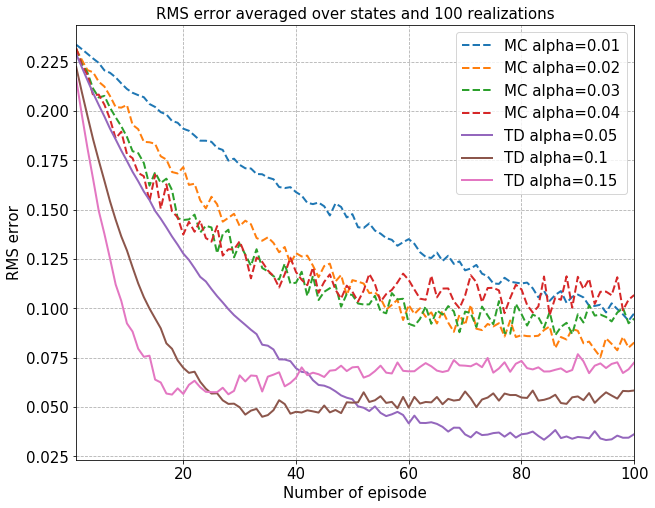

In [10]:
fig, ax = plt.subplots(figsize=(10,8))
fontsize = 15
for alpha in mc_alpha_array:
    ax.plot(num_episode_array, 
            rms_error_mc_dict[int(100*alpha)],
            linewidth=2,
            linestyle='--',
            label='MC alpha='+str(alpha))
for alpha in td_alpha_array:
    ax.plot(num_episode_array, 
            rms_error_td_dict[int(100*alpha)],
            linewidth=2,
            linestyle='-',
            label='TD alpha='+str(alpha))
ax.set_xlim([min(num_episode_array),max(num_episode_array)])
ax.grid(linestyle='--')
ax.legend(loc='best', fontsize=fontsize)
ax.set_xlabel('Number of episode', fontsize=fontsize)
ax.set_ylabel('RMS error', fontsize=fontsize)
ax.set_title('RMS error averaged over states and 100 realizations', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
plt.show()